In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [2]:
img_path = "/Users/aida/Documents/Modules/Thesis/lake-victoria/data/planet/lake-area/"
img_folder = "EOL-8Bands/"
img_file = "composite.tif"
udm_file = "composite_udm2.tif"

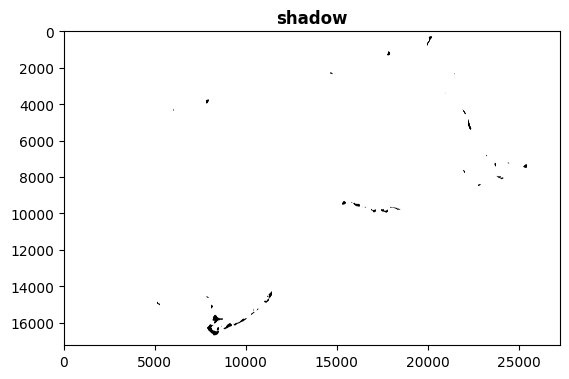

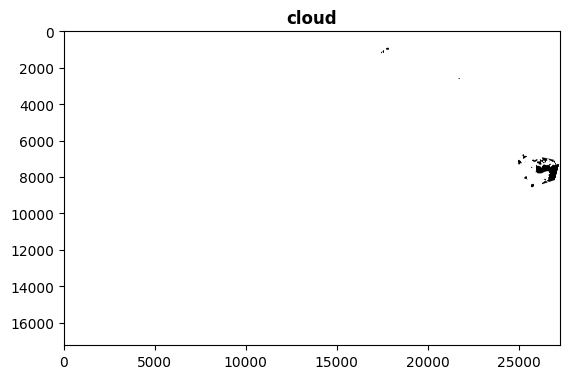

<AxesSubplot: title={'center': 'cloud'}>

In [3]:
with rasterio.open(img_path + img_folder + udm_file) as src:
    shadow_mask = src.read(3).astype(bool)
    cloud_mask = src.read(6).astype(bool)

show(shadow_mask, title="shadow", cmap="binary")
show(cloud_mask, title="cloud", cmap="binary")

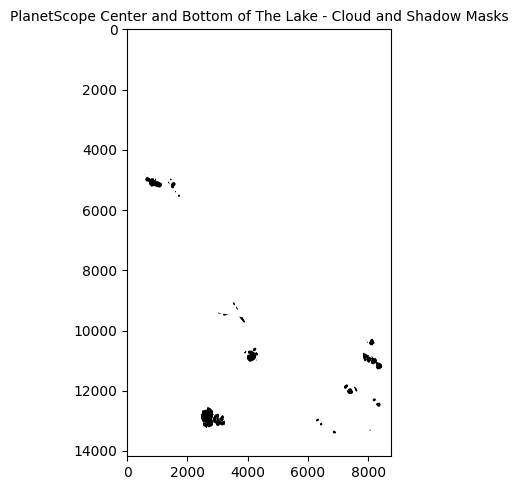

In [35]:
import rasterio
from matplotlib import pyplot
mask = shadow_mask + cloud_mask

# Plot your data
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(mask, cmap='binary')
ax.set_title(
    "PlanetScope Center and Bottom of The Lake - Cloud and Shadow Masks",
    fontsize=10,
)
plt.tight_layout()
#plt.savefig("/Users/aida/Documents/Modules/Thesis/lake-victoria/plots/ps8bands_sol_cloud_shadow_mask.png")    

In [4]:
with rasterio.open(img_path + img_folder + img_file) as src:
    profile = src.profile
    img_data = src.read([6, 4, 2], masked=True)  / 10000.0 # apply RGB ordering and scale down

In [5]:
img_data.transpose((1, 2, 0)).shape

(17242, 27253, 3)

In [ ]:
#Plot your data
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(img_data.transpose((1, 2, 0))) 
ax.set_title(
    "Planet Scope Center and Bottom of The Lake",
    fontsize=8,
)
plt.tight_layout()
plt.gcf().set_facecolor("white")
#plt.savefig("/Users/aida/Documents/Modules/Thesis/lake-victoria/plots/ps8bands_eol.png")    


# #show(img_data, title="Planet Scope Top Of The Lake")

In [8]:
img_data.mask = mask
img_data_masked = img_data.filled(fill_value=0)

In [ ]:
# show(img_data, title="masked image")

#Plot your data
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(img_data_masked.transpose((1, 2, 0)))
ax.set_title(
    "Planet Scope Center and Bottom of The Lake - Cloud and Shadow Masked",
    fontsize= 8,
)
plt.tight_layout()
plt.savefig("/Users/aida/Documents/Modules/Thesis/lake-victoria/plots/ps8bands_sol_masked.png")    




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [27]:
import os
import numpy as np
import rasterio
from matplotlib import pyplot as plt

data_path = "/Users/aida/Documents/Modules/Thesis/lake-victoria/data/planet/lake-area/"
img_path = "/Users/aida/Documents/Modules/Thesis/lake-victoria/data/planet/lake-area/"
img_folder = "TOL-8Bands/"
img_file = "composite.tif"
udm_file = "composite_udm2.tif"

def normalize(band, ratio=4):
    min_b, max_b = np.min(band), np.max(band)
    return np.clip(ratio * (band - min_b) / (max_b - min_b), 0, 1)


def get_images(img_path, image_category='TOL-8Bands', num_bands=8, brightness_ratio=4, scale=0.00001):
    img_name = os.path.join(data_path, f'{image_category}/composite.tif')
    img_udm = os.path.join(data_path, f'{image_category}/composite_udm2.tif')

    # load image
    print(f'Loading {img_name}')
#     raw_img = rasterio.open(img_name)
    
    raw_img =  rasterio.open(img_name)
    img_sc = (np.raw_img * 3.7)/ 10000.0
    profile = raw_img.profile
    #img_data = raw_img.read([6, 4, 2], masked=True) * 3.7 / 10000.0 # apply RGB ordering and scale down

    print(f'Loading {img_udm}')
    with rasterio.open(img_udm) as src:
        shadow_mask = src.read(3).astype(bool)
        cloud_mask = src.read(6).astype(bool)

    mask = shadow_mask + cloud_mask
    img_sc.mask = mask
    img = img_sc.filled(fill_value=0)
    
   
#     bands = [normalize(raw_img.read(i), ratio=brightness_ratio) for i in raw_img.indexes]
#     num_bands = len(bands)
#     if num_bands == 4:
#         rgb_index = (3, 2, 1)
#     elif num_bands == 8:
#         rgb_index = (6, 4, 2)

#     img = np.dstack(
#         [bands[i - 1] for i in rgb_index] +
#         [bands[i - 1] for i in raw_img.indexes if i not in rgb_index] +
#         [normalize((bands[rgb_index[1] - 1] - bands[-1]) / (bands[rgb_index[1] - 1] + bands[-1] + 1e-6))]# NDWI
#         [normalize((bands[-1] - bands[rgb_index[0] - 1]) / (bands[-1] + bands[rgb_index[0] - 1]))]  # NDVI
#     )
#     img.mask = mask
# #     img_data_masked = img.filled(fill_value=0)

    return img

get_images(img_path, image_category='TOL-8Bands', num_bands=8, brightness_ratio=4)
# def plot_patch_mask(patch, mask):
#     plt.clf()
#     plt.subplot(1, 2, 1)
#     plt.imshow(patch[:, :, :3])
#     plt.title('Patch')
#     plt.subplot(1, 2, 2)
#     plt.imshow(mask)
#     plt.title('Mask')
#     plt.draw()
#     plt.show()


Loading /Users/aida/Documents/Modules/Thesis/lake-victoria/data/planet/lake-area/TOL-8Bands/composite.tif


TypeError: unsupported operand type(s) for *: 'DatasetReader' and 'float'